# Customer Churn Prediction
---

## Step 1: Business Understanding
Namibia ventures is trying to increase its profit or revenue margin and customers retention is one key area it is focusing it's resources. As a data analysts of the company we are tasked to build a machine model to predict customer churn.

#### Problem Statement:
Customer attrition is one of the biggest expenditures of any organization. Customer churn otherwise known as customer attrition or customer turnover is the percentage of customers that stopped using your company's product or service within a specified timeframe.

In this project, we aim to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.

#### Objective
In this analysis we will: 
- Identifying trends and patterns in custormer churns.
- Determine Indicators which influences customer churn.
- Build a Machine learning model to classify customers into categories/classes.
- Use the model to predict customer churn.

#### Analytical Questions
1. What are the primary factors influencing customer churn in the Company?

2. What are the demographic factors that influence customer churn?
    - Analyze the relationship between demographic variables (Gender, SeniorCitizen, Partner, Dependents) and the churn rate.
 
3. How does contract type affect the likelihood of customer churn?
 
    - Objective: Examine the relationship between different contract types (e.g., month-to-month, one-year, two-year contracts) and churn rates. Determine if certain contract types are associated with higher or lower churn.

4. Which services are most associated with customer churn?
    - Examine the relationship between service usage (PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) and churn.
 
5. What is the impact of monthly charges of a customer churning?
    - Objective: Analyze how monthly charges leads to higher churn.
 

 
 


- Null Hypothesis (H0): There are no significant differences in 
Churn amongst the columns.
- Alternate Hypothesis (H1): There are significant differences in 
Churn amongst the columns.

## Step 2: Data Understanding
The data for this projects has been divided into 3. The first 2 data sets are for training and evaluation the machine learning model  while the last data set is for testing the model.

#### Data Dictionary
The data for this project is in a csv format. The following describes the columns present in the data.

Gender -- Whether the customer is a male or a female

SeniorCitizen -- Whether a customer is a senior citizen or not

Partner -- Whether the customer has a partner or not (Yes, No)

Dependents -- Whether the customer has dependents or not (Yes, No)

Tenure -- Number of months the customer has stayed with the company

Phone Service -- Whether the customer has a phone service or not (Yes, No)

MultipleLines -- Whether the customer has multiple lines or not

InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)

OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

Contract -- The contract term of the customer (Month-to-Month, One year, Two year)

PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

MonthlyCharges -- The amount charged to the customer monthly

TotalCharges -- The total amount charged to the customer

Churn -- Whether the customer churned or not (Yes or No)

### Step 1: Load Data

#### Install Packages and Import libraries

Install pyodbc and python-dotenv if necessary

In [1]:
# %pip install pyodbc  
# %pip install python-dotenv 

Importing the necessary packages 

In [2]:
# Import the pyodbc library to handle ODBC database connections
import pyodbc 

# Import the dotenv function to load environment variables from a .env file
from dotenv import dotenv_values 

# Import the pandas library for data manipulation and analysis
import pandas as pd 

# Import the warnings library to handle warning messages
import warnings

# Filter out (ignore) any warnings that are raised
warnings.filterwarnings('ignore')

# Import the numpy library for data manipulation and analysis
import numpy as np

# Import the seaborn library for data visualization
import seaborn as sns

import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols



#### Load 1st Data

Establishing a connection to the SQL database

In [3]:
# # Load environment variables from .env file into a dictionary
# environment_variables = dotenv_values('.env')

# # Get the values for the credentials you set in the .env file
# database = environment_variables.get("DATABASE")
# server = environment_variables.get("SERVER")
# username = environment_variables.get("UID")
# password = environment_variables.get("PWD")

# # Create the connection string using the retrieved credentials
# connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

# print(connection_string)

Load Data

In [4]:
#             #----------Load 2020 data----------
# # Establish a connection to the database using the connection string
# connection = pyodbc.connect(connection_string) 

# # Define the SQL query to select all columns from the specified table
# query = "Select * from LP2_Telco_churn_first_3000"

# # Execute the SQL query and fetch the result into a pandas DataFrame using the established database connection
# data1 = pd.read_sql(query, connection)

# Export data to CSV
# data1.to_csv('data1.csv', index=False)

In [5]:
# Read the exported file
df_1= pd.read_csv(r"C:\Users\Pc\Desktop\Data analysis\Azubi Africa\Career Accelerator\LP2\Customer-churn-analysis\data\data1.csv")

# Create a new column for df_1
df_1['type'] = 'train'

df_1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,type
0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,...,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False,train
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False,train
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True,train
3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,True,...,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False,train
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True,train


In [6]:
# Find the shape of data
df_1.shape

(3000, 22)

#### Load 2nd Data

In [7]:
# Read 2nd Data from CSV
df_2 = pd.read_csv(r"C:\Users\Pc\Desktop\Data analysis\Azubi Africa\Career Accelerator\LP2\Customer-churn-analysis\data\LP2_Telco-churn-second-2000.csv")

# Create a new column for df_2
df_2['type'] = 'train'
df_2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,type
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No,train
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes,train
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No,train
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes,train
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No,train


In [8]:
# Find the shape of data
df_2.shape

(2043, 22)

#### Load 3rd Data (Test Data)

In [9]:
# Read 3nd Data
df_3 = pd.read_excel(r"C:\Users\Pc\Desktop\Data analysis\Azubi Africa\Career Accelerator\LP2\Customer-churn-analysis\data\Telco-churn-last-2000.xlsx")

# Create a new column for df_2
df_3['type'] = 'test'
df_3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,type
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55,test
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8,test
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55,test
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55,test
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15,test


In [10]:
# Find shape of file
df_3.shape

(2000, 21)

#### Merge all data to form "train_df"

In [11]:
# Join the "df_1", "df_2" & "df_3" to form "train"

train_df = pd.concat([df_1, df_2, df_3], ignore_index=True)

train_df.shape

(7043, 22)

In [12]:
train_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,type
0,7590-VHVEG,Female,0,True,False,1,False,NaN,DSL,False,...,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False,train
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,False,False,False,One year,False,Mailed check,56.950001,1889.5,False,train
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True,train
3,7795-CFOCW,Male,0,False,False,45,False,NaN,DSL,True,...,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False,train
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True,train


### Step 2: Read and analyze dataset

In [13]:
# View the train_df data
train_df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,type
2719,4295-YURET,Female,1,True,True,56,True,False,DSL,True,...,True,True,True,Two year,True,Credit card (automatic),72.599998,4084.350098,False,train
4054,9445-SZLCH,Female,0,Yes,Yes,36,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),97.350000,3457.9,Yes,train
3393,5376-DEQCP,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.600000,70.6,Yes,train
6761,3556-BVQGL,Female,0,Yes,No,20,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,20.000000,416.45,NaN,test
6782,3088-LHEFH,Female,0,No,No,11,Yes,Yes,Fiber optic,Yes,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.000000,929.3,NaN,test


In [14]:
# check for total number of rows and columns
train_df.shape

(7043, 22)

In [15]:
# Check the data info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     6774 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    6392 non-null   object 
 10  OnlineBackup      6392 non-null   object 
 11  DeviceProtection  6392 non-null   object 
 12  TechSupport       6392 non-null   object 
 13  StreamingTV       6392 non-null   object 
 14  StreamingMovies   6392 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Columns are not in their right data types
___

Observe the unique values of the data

In [16]:
# View the number of unique values of each column
train_df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                4
Dependents             4
tenure                73
PhoneService           4
MultipleLines          5
InternetService        3
OnlineSecurity         5
OnlineBackup           5
DeviceProtection       5
TechSupport            5
StreamingTV            5
StreamingMovies        5
Contract               3
PaperlessBilling       4
PaymentMethod          4
MonthlyCharges      2351
TotalCharges        6791
Churn                  4
type                   2
dtype: int64

Investigate the unique characters in the data

In [17]:
# List the Columns with True/False values
bool_columns = ["SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","Churn"]

# Check 
all_cols = train_df.columns

# Dictionary to hold unique values for each category
uniques = {}

# Loop through each category and get unique values
for category in all_cols:
    uniques[category] = train_df[category].unique()

# Display unique values for each category
uniques

{'customerID': array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4816-JBHOV',
        '8920-NAVAY', '1699-TLDLZ'], dtype=object),
 'gender': array(['Female', 'Male'], dtype=object),
 'SeniorCitizen': array([0, 1]),
 'Partner': array([True, False, 'No', 'Yes'], dtype=object),
 'Dependents': array([False, True, 'No', 'Yes'], dtype=object),
 'tenure': array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
        21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
         9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
        36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
        54, 51, 26,  0, 39]),
 'PhoneService': array([False, True, 'Yes', 'No'], dtype=object),
 'MultipleLines': array([nan, False, True, 'No', 'No phone service', 'Yes'], dtype=object),
 'InternetService': array(['DSL', 'Fiber optic', 'No'], dtype=object),
 'OnlineSecurity': array([False, True, nan, 'No', 'Yes', 'No internet service'], d

- There are columns with boolean features having characters that are the same as the boolean characters such as (True, False: Yes, No, No phone service, No internet service)
___

In [18]:
# Check for duplicates
dup_no= train_df.duplicated().sum()

print("Number of duplicates:", dup_no)

Number of duplicates: 0


___

Checking for null values


In [19]:
# For overall data
print(train_df.isna().sum())

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines        269
InternetService        0
OnlineSecurity       651
OnlineBackup         651
DeviceProtection     651
TechSupport          651
StreamingTV          651
StreamingMovies      651
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           5
Churn               2001
type                   0
dtype: int64


In [20]:
#For Train dataset
print("For only train data:")
print(train_df[train_df["type"]=='train'].isna().sum())


For only train data:
customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
type                  0
dtype: int64


- Most null values are found the train type dataset except for the 2000 null values of "Churn" in the test type dataset

#### Investigate missing values

Missing values in TotalCharges column

In [21]:
train_df[train_df["TotalCharges"].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,type
488,4472-LVYGI,Female,0,True,True,0,False,NaN,DSL,True,...,True,True,False,Two year,True,Bank transfer (automatic),52.549999,NaN,False,train
753,3115-CZMZD,Male,0,False,True,0,True,False,No,NaN,...,NaN,NaN,NaN,Two year,False,Mailed check,20.250000,NaN,False,train
936,5709-LVOEQ,Female,0,True,True,0,True,False,DSL,True,...,False,True,True,Two year,False,Mailed check,80.849998,NaN,False,train
1082,4367-NUYAO,Male,0,True,True,0,True,True,No,NaN,...,NaN,NaN,NaN,Two year,False,Mailed check,25.750000,NaN,False,train
1340,1371-DWPAZ,Female,0,True,True,0,False,NaN,DSL,True,...,True,True,False,Two year,False,Credit card (automatic),56.049999,NaN,False,train


In [22]:
# rows with spaces as missing values
train_df[train_df["TotalCharges"]==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,type
3218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No,train
4670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,No,Two year,No,Mailed check,73.35,,No,train
4754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No,train
5374,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,NaN,test
5869,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,NaN,test
6423,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,NaN,test


- Total number of missing values in "TotalCharges" is 11 including empty spaces recognized as string

___

Missing values in the "OnlineService"

In [23]:
# View the missing values
train_df[train_df["OnlineSecurity"].isna()].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,type
11,7469-LKBCI,Male,0,False,False,16,True,False,No,NaN,...,NaN,NaN,NaN,Two year,False,Credit card (automatic),18.950001,326.799988,False,train
16,8191-XWSZG,Female,0,False,False,52,True,False,No,NaN,...,NaN,NaN,NaN,One year,False,Mailed check,20.650000,1022.950012,False,train
21,1680-VDCWW,Male,0,True,False,12,True,False,No,NaN,...,NaN,NaN,NaN,One year,False,Bank transfer (automatic),19.799999,202.25,False,train
22,1066-JKSGK,Male,0,False,False,1,True,False,No,NaN,...,NaN,NaN,NaN,Month-to-month,False,Mailed check,20.150000,20.15,True,train
33,7310-EGVHZ,Male,0,False,False,1,True,False,No,NaN,...,NaN,NaN,NaN,Month-to-month,False,Bank transfer (automatic),20.200001,20.200001,False,train


Check its relations to the other columns

In [24]:
# Create a DataFrame containing rows where "OnlineSecurity" is null and drop the "customerID" column
nulls_651 = train_df[train_df["OnlineSecurity"].isna()].drop(columns=["customerID"])

# Create an empty Dictionary
new_unique= {}

# Loop through each category and get unique values
for cols in nulls_651:
    new_unique[cols] = nulls_651[cols].unique()

# Display unique values for each category
new_unique


{'gender': array(['Male', 'Female'], dtype=object),
 'SeniorCitizen': array([0, 1]),
 'Partner': array([False, True], dtype=object),
 'Dependents': array([False, True], dtype=object),
 'tenure': array([16, 52, 12,  1, 17, 34, 50, 62, 45, 49, 48, 46,  5, 72, 41,  6,  4,
        43, 64, 57, 71,  3, 22, 10, 11, 69, 32, 61, 13, 59, 24, 29, 35,  8,
        63, 70, 47, 33, 19, 23, 20, 40, 44, 36,  2, 15, 55, 60, 65, 66,  7,
        68, 37, 53, 51, 58,  9,  0, 14, 39, 42, 38, 26, 27, 21, 25, 54, 31,
        28, 67, 56, 18, 30]),
 'PhoneService': array([True], dtype=object),
 'MultipleLines': array([False, True], dtype=object),
 'InternetService': array(['No'], dtype=object),
 'OnlineSecurity': array([nan], dtype=object),
 'OnlineBackup': array([nan], dtype=object),
 'DeviceProtection': array([nan], dtype=object),
 'TechSupport': array([nan], dtype=object),
 'StreamingTV': array([nan], dtype=object),
 'StreamingMovies': array([nan], dtype=object),
 'Contract': array(['Two year', 'One year', 'M

- All the 651 nulls have phone service but no internet service, indicating that all services which require internet will not be available for them, hence "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies" will not be available.
_____

Missing values in the "TotalCharges"

In [25]:
# View the necessacary columns
train_df[["tenure","MonthlyCharges","TotalCharges"]]

,tenure,MonthlyCharges,TotalCharges
0,1,29.850000,29.85
1,34,56.950001,1889.5
2,2,53.849998,108.150002
3,45,42.299999,1840.75
4,2,70.699997,151.649994
...,...,...,...
7038,7,75.100000,552.95
7039,47,74.050000,3496.3
7040,2,44.700000,93.7
7041,62,110.750000,7053.35


- The missing values in the "TotalCharges" can be imputed by calculating the multiple of "tenure" and the "MonthlyCharge"
___

Missing values in the "MultipleLines"

In [26]:
train_df[train_df["MultipleLines"].isna()].head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,type
0,7590-VHVEG,Female,0,True,False,1,False,NaN,DSL,False,...,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False,train
3,7795-CFOCW,Male,0,False,False,45,False,NaN,DSL,True,...,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False,train
7,6713-OKOMC,Female,0,False,False,10,False,NaN,DSL,True,...,False,False,False,Month-to-month,False,Mailed check,29.750000,301.899994,False,train
20,8779-QRDMV,Male,1,False,False,1,False,NaN,DSL,False,...,False,False,True,Month-to-month,True,Electronic check,39.650002,39.650002,True,train
27,8665-UTDHZ,Male,0,True,True,1,False,NaN,DSL,False,...,False,False,False,Month-to-month,False,Electronic check,30.200001,30.200001,True,train


In [27]:
# Create a DataFrame containing rows where "OnlineSecurity" is null and drop the "customerID" column
nulls_ml = train_df[train_df["MultipleLines"].isna()].drop(columns=["customerID"])

# Create an empty Dictionary
new2_unique= {}

# Loop through each category and get unique values
for cols in nulls_ml:
    new2_unique[cols] = nulls_ml[cols].unique()

# Display unique values for each category
new2_unique

{'gender': array(['Female', 'Male'], dtype=object),
 'SeniorCitizen': array([0, 1]),
 'Partner': array([True, False], dtype=object),
 'Dependents': array([False, True], dtype=object),
 'tenure': array([ 1, 45, 10, 72, 11, 29, 66,  5, 32, 64, 36, 71, 25, 58,  3, 57, 24,
        67, 31, 14, 68, 69, 28, 23, 21, 27, 42, 33, 26, 60, 70, 48,  0, 22,
        13, 16,  9,  8, 40,  4, 49, 52,  2, 63,  6, 34, 12, 62, 51,  7, 44,
        19, 41, 18, 53, 43, 50, 59, 39, 37, 65, 17, 54, 61, 46, 35]),
 'PhoneService': array([False], dtype=object),
 'MultipleLines': array([nan], dtype=object),
 'InternetService': array(['DSL'], dtype=object),
 'OnlineSecurity': array([False, True], dtype=object),
 'OnlineBackup': array([True, False], dtype=object),
 'DeviceProtection': array([False, True], dtype=object),
 'TechSupport': array([False, True], dtype=object),
 'StreamingTV': array([False, True], dtype=object),
 'StreamingMovies': array([False, True], dtype=object),
 'Contract': array(['Month-to-month', 'O

- Those with missing values in the "MultipleLines" have internet service (DSL) but no phone service, indicating that customers are using only one service.
___

#### Key Insights:
- There are columns with boolean features having characters that are the same as the boolean characters. These are= (True, False: Yes, No, No phone service, No internet service)
- Most null values are found the train type dataset except for the 2000 null values of "Churn" in the test type dataset
- All columns with 651 missing values have no internet service, therefore all services/features requiring internet connections are not available to them.
- Missing values in "TotalCharges" is 11 including empty spaces recognized as string
- The missing values in the "TotalCharges" can be imputed by calculating the multiple of "tenure" and the "MonthlyCharge"
- Those with missing values in the "MultipleLines" have internet service (DSL) but no phone service, indicating that these customers are using only one line of service.
- The single missing value in "Churn" can be removed since the size is insignificant.
- Some columns are not in their right data type

### Step 3: Data Cleaning

1. Replace the necessary characters with the right booleans in train and test dataset.
2. Fill the missing values of all the columns  except "TotalCharges" with "False".
3. Impute the empty spaces and missing values in "TotalCharges" with the multiple of "tenure" and "MonthlyCharges" columns
4. Remove the missing value of "Churns" in the 'train' type column
5. Change the dtypes of the columns
6. Split data to train and test using the "type" column and drop the "type" column


Replace the necessary characters with the right booleans (Train dataset)

In [28]:
# List the Columns with True/False values
bool_columns = ["SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","Churn"]

# Words to replace (using dictionary)
replacements = {"No":False, 0:False, "No phone service":False, "No internet service":False, "Yes":True, 1:True}

# Replace stings to boolean values
train_df[bool_columns]= train_df[bool_columns].replace(replacements)

# Empty dictionary
special= {}

# Loop through each category and get unique values
for chars in bool_columns:
    special[chars] = train_df[chars].unique()

# Display unique values for each category
special


{'SeniorCitizen': array([False,  True]),
 'Partner': array([ True, False]),
 'Dependents': array([False,  True]),
 'PhoneService': array([False,  True]),
 'MultipleLines': array([nan, False, True], dtype=object),
 'OnlineSecurity': array([False, True, nan], dtype=object),
 'OnlineBackup': array([True, False, nan], dtype=object),
 'DeviceProtection': array([False, True, nan], dtype=object),
 'TechSupport': array([False, True, nan], dtype=object),
 'StreamingTV': array([False, True, nan], dtype=object),
 'StreamingMovies': array([False, True, nan], dtype=object),
 'PaperlessBilling': array([ True, False]),
 'Churn': array([False, True, nan], dtype=object)}

___

Fill the missing values in the boolean columns with "False"

In [29]:
# Check for missing values
train_df.isna().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines        269
InternetService        0
OnlineSecurity       651
OnlineBackup         651
DeviceProtection     651
TechSupport          651
StreamingTV          651
StreamingMovies      651
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           5
Churn               2001
type                   0
dtype: int64

In [30]:
# Select and fill the necessary boolean columns with "False" value
sliced_data= train_df.iloc[:,:-4].fillna(False)
sliced_data.isna().sum()

# Update the columns in the original DataFrame with the filled data in sliced_data
train_df.loc[sliced_data.index, sliced_data.columns]= sliced_data
train_df.isna().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           5
Churn               2001
type                   0
dtype: int64

___

Impute the empty spaces and missing values in "TotalCharges" with the multiple of "tenure" and "MonthlyCharges" columns

In [31]:
# Calculate TotalCharges for rows with null values in TotalCharges
null_values = train_df[(train_df["TotalCharges"].isnull())|(train_df["TotalCharges"]==" ")]
null_values["TotalCharges"] = null_values["tenure"] * null_values["MonthlyCharges"]

# Update the TotalCharges column in the original DataFrame with the calculated values
train_df.loc[null_values.index, "TotalCharges"] = null_values["TotalCharges"]

# Checking for null values
null_2= train_df["TotalCharges"].isna().sum()

print("Nulls in TotalCharges:", null_2)

Nulls in TotalCharges: 0


In [32]:
# Check for tenures with "0" values
null_values[null_values["TotalCharges"]==0].shape

(11, 22)

- The total charges of newly registered customers is zero because they have not completed their first month of subscription (pending total charge).

___

Remove missing value in "Churns" column

In [33]:
# Removing missing value in "Churn" column for rows where 'type' is 'train'
# Using indexing
train_df = train_df.drop(train_df[(train_df['type'] == 'train') & (train_df['Churn'].isna())].index).reset_index(drop=True)

train_df.isna().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn               2000
type                   0
dtype: int64

Change the dtypes of the columns

In [34]:
# Create a list of the categorical columns
categorical_vals=["gender","InternetService","Contract","PaymentMethod"]

# Change the Dtype of the columns
train_df[categorical_vals]= train_df[categorical_vals].astype("category")   # categorical columns

train_df["tenure"]= train_df["tenure"].astype("int64")                      # Integer column

train_df["TotalCharges"]= pd.to_numeric(train_df["TotalCharges"])           # Float column


# Check the dtypes of the columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7042 non-null   object  
 1   gender            7042 non-null   category
 2   SeniorCitizen     7042 non-null   bool    
 3   Partner           7042 non-null   bool    
 4   Dependents        7042 non-null   bool    
 5   tenure            7042 non-null   int64   
 6   PhoneService      7042 non-null   bool    
 7   MultipleLines     7042 non-null   object  
 8   InternetService   7042 non-null   category
 9   OnlineSecurity    7042 non-null   object  
 10  OnlineBackup      7042 non-null   object  
 11  DeviceProtection  7042 non-null   object  
 12  TechSupport       7042 non-null   object  
 13  StreamingTV       7042 non-null   object  
 14  StreamingMovies   7042 non-null   object  
 15  Contract          7042 non-null   category
 16  PaperlessBilling  7042 n

Split data set to train_df and test_df using 'type' column and drop the 'type' column

In [35]:
test_df= train_df[train_df['type']=='test'].drop('type', axis=1)
train_df= train_df[train_df['type']=='train'].drop('type', axis=1)

print("train data:", train_df.shape)
print("test data:", test_df.shape)

train data: (5042, 21)
test data: (2000, 21)


### Step 4: Exploratory Data Analysis

Statistic Summary

In [36]:
# Check the statical summary of the numerical features
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,5042.0,32.568822,24.525954,0.0,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5042.0,65.081376,30.064564,18.4,35.762500,70.550003,90.050002,118.650002
TotalCharges,5042.0,2297.303898,2268.395584,0.0,415.637498,1398.125000,3857.012573,8670.100000


- The average tenure of customers is approximately 32 months (2 and half yrs).
- The tenure ranges from 0 to 72 months, indicating the presence of new customers and customers who've been with the company for 6 years.
- The average monthly charge is approximately $65.
- The average Total charge is $2303.2 while the median is $1398.3, indicating the possible prescence of outliers.
- Some customers having very high total charges likely due to long tenure and higher monthly expenses.

___

In [37]:
train_df.describe(include= "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,5042,5042,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,5042,2,Male,2558,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,5042,2,False,4223,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,5042,2,False,2585,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,5042,2,False,3481,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,5042.0,NaN,NaN,NaN,32.568822,24.525954,0.0,9.0,29.0,56.0,72.0
PhoneService,5042,2,True,4553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,5042,2,False,2913,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,5042,3,Fiber optic,2247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,5042,2,False,3587,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
all_cols = train_df.columns

for column in all_cols:
    print(f'{column}')
    print(f'There are {train_df[column].unique().size} unique values')
    print(f'{train_df[column].unique()}')
    print('=' * 50)


customerID
There are 5042 unique values
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
There are 2 unique values
['Female', 'Male']
Categories (2, object): ['Female', 'Male']
SeniorCitizen
There are 2 unique values
[False  True]
Partner
There are 2 unique values
[ True False]
Dependents
There are 2 unique values
[False  True]
tenure
There are 73 unique values
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
There are 2 unique values
[False  True]
MultipleLines
There are 2 unique values
[False True]
InternetService
There are 3 unique values
['DSL', 'Fiber optic', 'No']
Categories (3, object): ['DSL', 'Fiber optic', 'No']
OnlineSecurity
There are 2 unique values
[False True]
OnlineBackup
There are 2 unique values
[True False]
DeviceProtection
There are 2 uniq

___

Visualizations

Determining columns with outliers

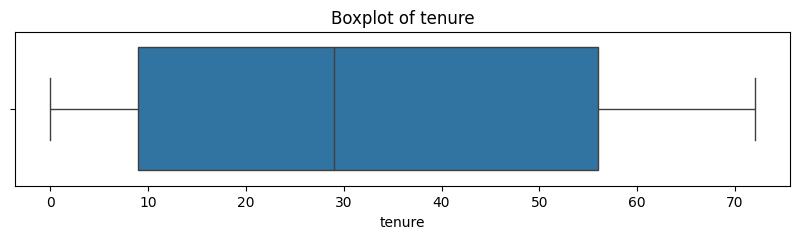

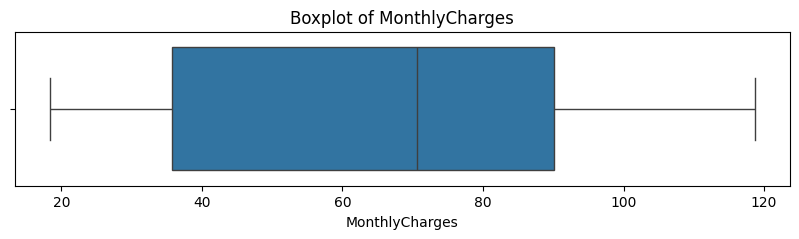

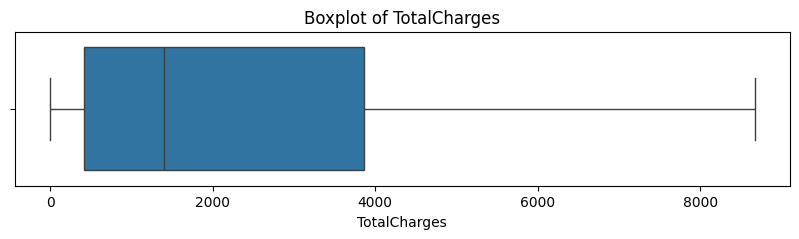

In [39]:
# Specifying numerical columns
numerical_cols = train_df[["tenure","MonthlyCharges","TotalCharges"]]

for column in numerical_cols:
    plt.figure(figsize=(10,2))
    sns.boxplot(x=column, orient="h", data=train_df)
    plt.title(f'Boxplot of {column}')
    plt.show()

In-depth look at total charges for outliers

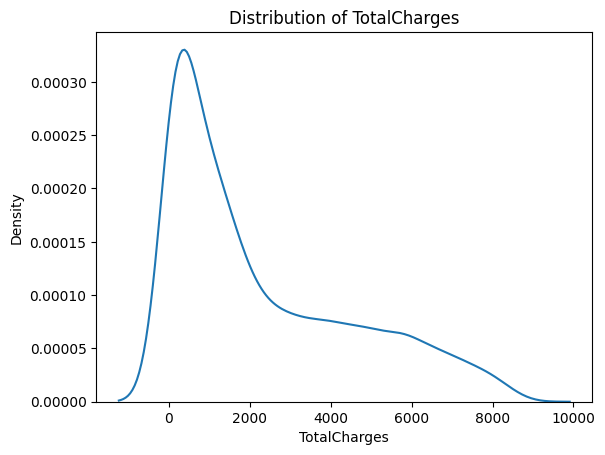

In [40]:
sns.kdeplot(x="TotalCharges", data= train_df)

plt.title("Distribution of TotalCharges")
plt.show()

Key insight:
- In as much as the graph is skewed to the right, There are no outliers in the "TotalCharges"

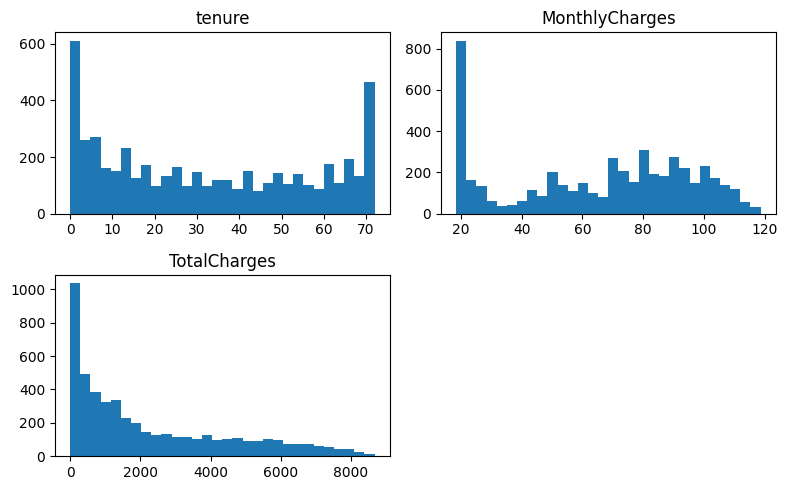

In [41]:
# Generating histograms
train_df.hist(
    figsize=(8, 5),
    bins=30,
    grid= False,
)

plt.tight_layout()
plt.show()

Key Insights:
-  In the tenure range, there are high frequencies at the beginning (0-10 months) and at the end (60-70 months). This might indicate that customers tend to either leave the service within the first year or stay loyal for a long period.
- The right skewed distribution of the "MonthlyCharges" indicate that most customers are paying relatively low monthly charges, but there is a significant number of customers with higher monthly charges.
- The right skewness of the "TotalCharges" towards lower charges could be due to the high number of new customers. Customers with low total charges might be those who have recently joined, while those with higher total charges are likely to be long-term customers.


___

Bivariant & Multivariant analysis

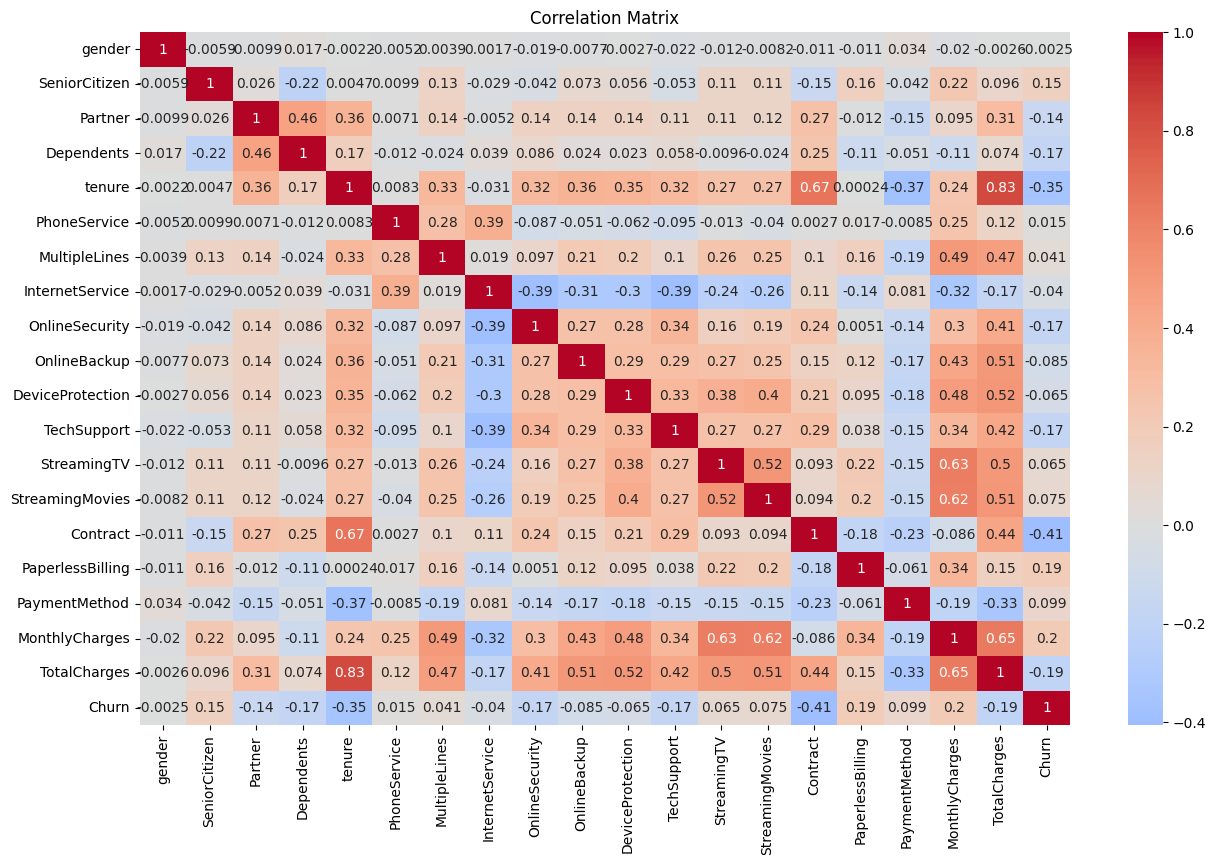

In [42]:
# Copy train_df to train_df1
train_df1 = train_df
train_df2 = train_df

# Convert categorical variables to numerical
train_df1['gender'] = train_df1['gender'].astype('category').cat.codes
train_df1['InternetService'] = train_df1['InternetService'].astype('category').cat.codes
train_df1['Contract'] = train_df1['Contract'].astype('category').cat.codes
train_df1['PaymentMethod'] = train_df1['PaymentMethod'].astype('category').cat.codes

# Calculate correlation matrix
correlation_matrix = train_df1.drop("customerID", axis=1).corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(15, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

Churn Correlation (Range -0.35 to 0.83):
- Customers who pay higher **monthly charges** are more likely to churn. (0.2)
- Customers with longer **tenures** are less likely to churn. (-0.35)
- Customers who have paid more in __total charge__ are less likely to churn, possibly due to the fact that they been with the company for long. (-0.19)
- Customers with __online security__ are less likely to churn. (-0.17)
- Customers who receive __tech support__ are less likely to churn. (-0.17)
- Customers with __dependents__ are less likely to churn eg(Parent, guardian, etc). (-0.17)

General Correlations:
- __TotalCharges and Tenure (0.83)__: This makes sense because the longer a customer stays, the more they are likely to have paid in total.
- __PhoneService and MultipleLines (0.83)__: Customers with phone service are very likely to have multiple lines.
- __StreamingTV and StreamingMovies (0.63)__: Customers who subscribe to one are likely to subscribe to the other.
- __MonthlyCharges and TotalCharges (0.65)__: Higher monthly charges contribute to higher total charges over time.
- __StreamingTV and MonthlyCharges (0.52)__: Customers with streaming TV moderately tend to have higher monthly charges.
- __StreamingMovies and MonthlyCharges (0.51)__: Similar to streaming TV, there is a moderate positive correlation between streaming movies and monthly charges.
- __MultipleLines and MonthlyCharges (0.49)__: Customers with multiple lines tend to have higher monthly charges.
- __OnlineBackup and OnlineSecurity (0.43)__: Customers with one service are likely to have the other.


 #### Answer Analystical Questions

##### 1. What are the primary factors influencing customer churn in the company?

From the correlation matrix, it can be deduced that the factors that the primary influence on customer churn are:
- __Major influence:__ Monthly charges and tenure columns.

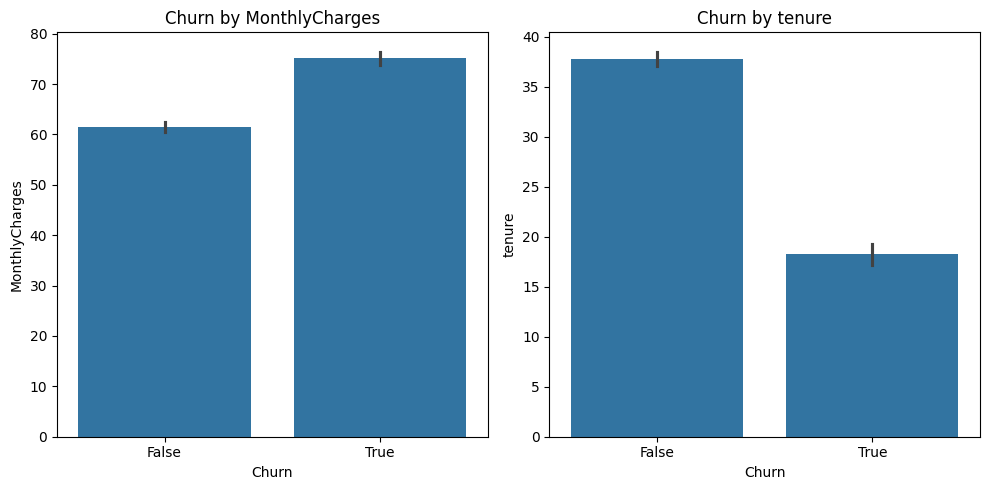

In [43]:
# Define churn_influence as:
main_influence = train_df[["MonthlyCharges", "tenure", "Churn"]]

# Define the columns to plot
columns = main_influence.drop("Churn", axis=1).columns.to_list()

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, column in enumerate(columns):
    sns.barplot(x="Churn", y=column, data=main_influence, ax=axes[i])
    axes[i].set_title(f"Churn by {column}")


# Adjust the layout
plt.tight_layout()
plt.show()


- Customers who pay higher **monthly charges** are more likely to churn. (0.2)

- Customers with longer **tenures** are less likely to churn. (-0.35)
- Customers who have paid more in __total charge__ are less likely to churn, possibly due to the fact that they been with the company for long. (-0.19)
- Customers with __online security__ are less likely to churn. (-0.17)
- Customers who receive __tech support__ are less likely to churn. (-0.17)
- Customers with __dependents__ are less likely to churn eg(Parent, guardian, etc). (-0.17)

##### 2. What are the demographic factors that influence customer churn?
    

Analyze the relationship between demographic variables (Gender, SeniorCitizen, Partner, Dependents) and the churn rate.

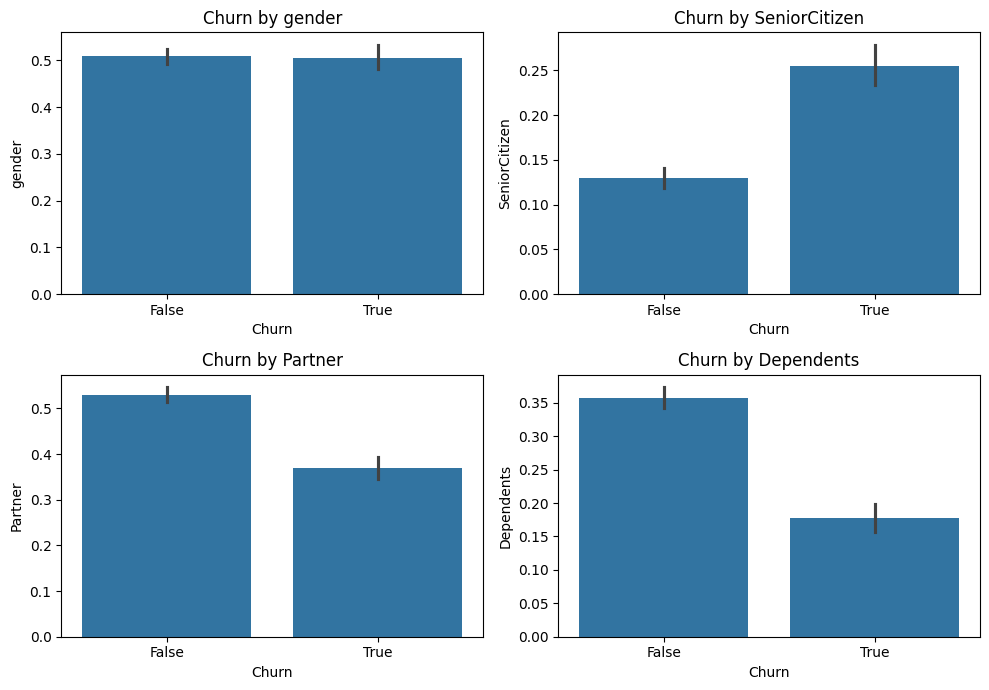

In [44]:
# Define churn_influence as:
demo_influence = train_df[["gender",'SeniorCitizen','Partner','Dependents', "Churn"]]

# Define the columns to plot
columns = demo_influence.drop("Churn", axis=1).columns.to_list()

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, column in enumerate(columns):
    sns.barplot(x="Churn", y=column, data=demo_influence, ax=axes[i])
    axes[i].set_title(f"Churn by {column}")


# Adjust the layout
plt.tight_layout()
plt.show()


Key Insights:
- There is no significant difference in churning between genders
- Senior citizens have a higher churn rate compared to non-senior citizens.
- Customers without partners have a higher churn rate than those with partners.
- Customers without dependents have a higher churn rate compared to those with dependents.

##### 3. How does contract type affect the likelihood of customer churn?

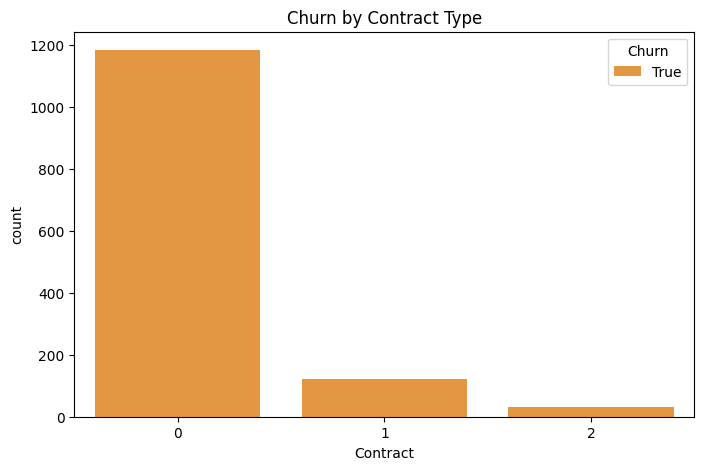

In [45]:
plt.figure(figsize=(8,5))
sns.countplot(x="Contract", hue="Churn", data=train_df[train_df["Churn"]==True], palette="YlOrBr")
plt.title("Churn by Contract Type")

# Show Graph
plt.show()

Key Insights:
- The majority of churn occurs with customers who have month-to-month contracts.

##### 4. Which services are most associated with customer churn?

Examine the relationship between service usage (PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) and churn.

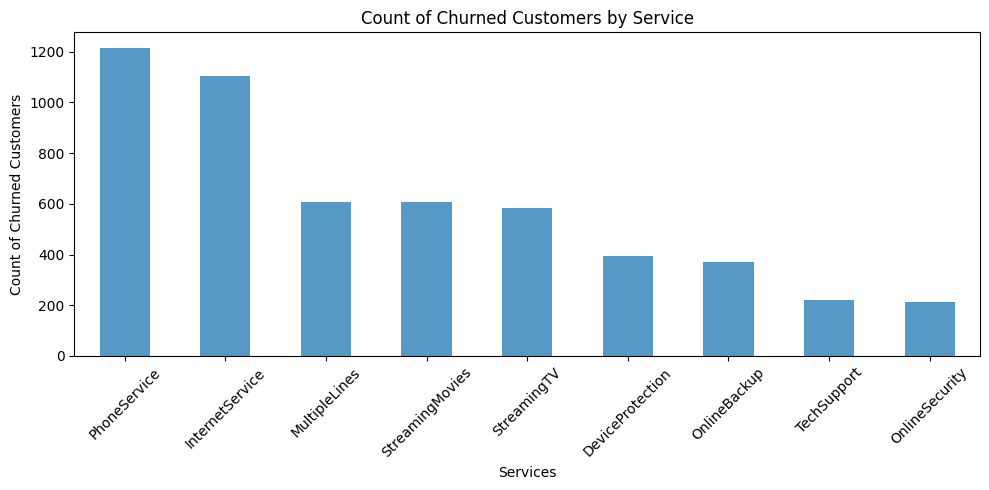

In [46]:
# Define the services 
service_influence = train_df[["PhoneService", 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                              'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                              'StreamingMovies', "Churn"]]

# Count the churned customers for each service
churn_counts = service_influence[service_influence['Churn'] == True].drop(columns=['Churn']).sum().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 5))
churn_counts.plot(kind='bar', alpha=0.75)
plt.title('Count of Churned Customers by Service')
plt.xlabel('Services')
plt.ylabel('Count of Churned Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Key Insights:
- Customers with __Phoneservice__ are more likely to churn than customers with the other services
- Customers with multiple lines, streaming movies and Tv features are slightly more likely to churn.

##### 5. What is the impact of monthly charges and tenure on a customer churning?

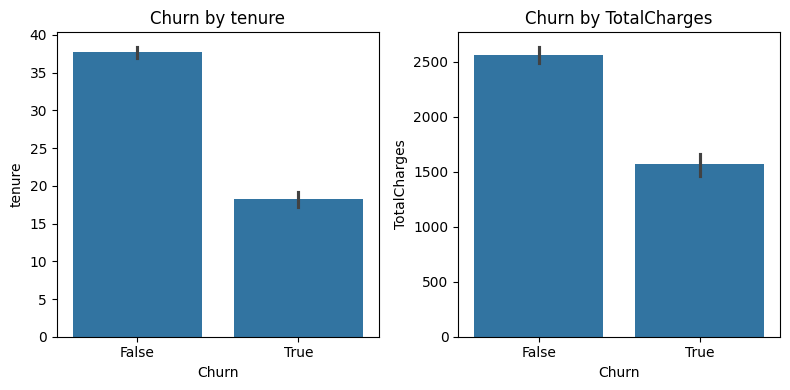

In [47]:
# Define churn_influence as:
tenure_tc = train_df[["tenure",'TotalCharges', "Churn"]]

# Define the columns to plot
columns = tenure_tc.drop("Churn", axis=1).columns.to_list()

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, column in enumerate(columns):
    sns.barplot(x="Churn", y=column, data=tenure_tc, ax=axes[i])
    axes[i].set_title(f"Churn by {column}")


# Adjust the layout
plt.tight_layout()
plt.show()


Key Insights:
- Customers with longer **tenures** are less likely to churn.
- Customers who have paid more in __total charge__ are less likely to churn, possibly due to the fact that they been with the company for long.
- This information has been verified on the correlation matrix, with the correlation of "tenures" and "TotalCharges" being 0.83

### Hypothesis testing

In [48]:
# rep= {True:1, False:0}

# train = train_df.replace(rep)

In [49]:
# # hypothesis: Amount
# import statsmodels.api as sm
# from statsmodels.formula.api import ols

# # Define thresholds
# threshold = 0.05

# # Perform ANOVA for each factor
# factors = train_df.drop(columns=["Churn","customerID"],axis=1).columns.to_list()
# p_values = {}

# for factor in factors:
#     model = ols('Churn ~ {}'.format(factor), data=train_df).fit()
#     anova_table = sm.stats.anova_lm(model, typ=2)
#     p_value = anova_table['PR(>F)'][0]
#     p_value_decimal= round(float(p_value),2)
#     print(p_value_decimal)

#     p_values[factor] = p_value_decimal

# # Compare p_values
# significant_factors = [factor for factor, p_value in p_values.items() if p_value < threshold]
# print('Significant factors with p_values below {}: {}'.format(threshold, significant_factors))

Key insight:
- Senior citizens are less likely to churn.
- Customers with partners are less likely to churn.
- Customers with dependents are less likely to churn.
    

## Step 4: Data Preparation

### Split dataset and create Pipelines


In [50]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline as imbPipeline


In [51]:
# Choose features for training
X = train_df.drop(columns=["Churn","customerID"], axis=1)
y = train_df["Churn"]

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size= 0.2, stratify=y ,random_state=42)
(X_train.shape, y_train.shape) , (X_eval.shape, y_eval.shape)

(((4033, 19), (4033,)), ((1009, 19), (1009,)))

In [52]:
# Split X to numerical and categorical columns
numerical_columns = X.select_dtypes("number").columns
categorical_columns=X.select_dtypes(["category","bool","object"]).columns

print(f"Numeric features: {len(numerical_columns)}")
print(f"Categorical features: {len(categorical_columns)}")
print("'Churn' has been seperated hence 16 categories")

Numeric features: 7
Categorical features: 12
'Churn' has been seperated hence 16 categories


___

Encoding y_train and y_test


In [53]:
# Encode the y_train and y_eval with OneHotEncoder
encoder1 = LabelEncoder()

y_train_encoded = encoder1.fit_transform(y_train)
y_eval_encoded = encoder1.transform(y_eval)


# Why is the OneHotEncoder not 

___

Check to see if yeo johnson transformation (Gaussian Distrbution) works well


In [54]:
def plots(df, var, t):
    plt.figure(figsize=(10, 4))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' +str(t).split('(')[0])

    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after ' +str(t).split('(')[0])


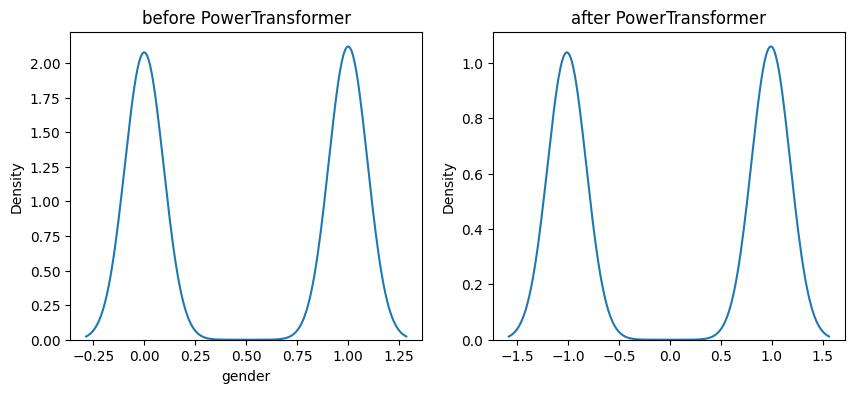

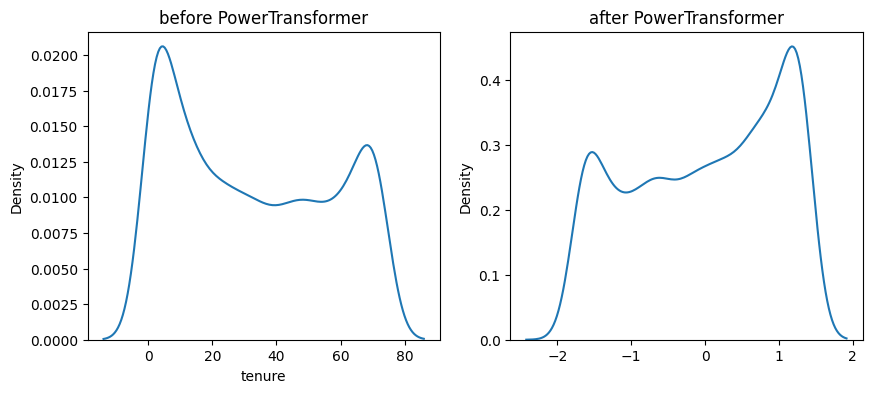

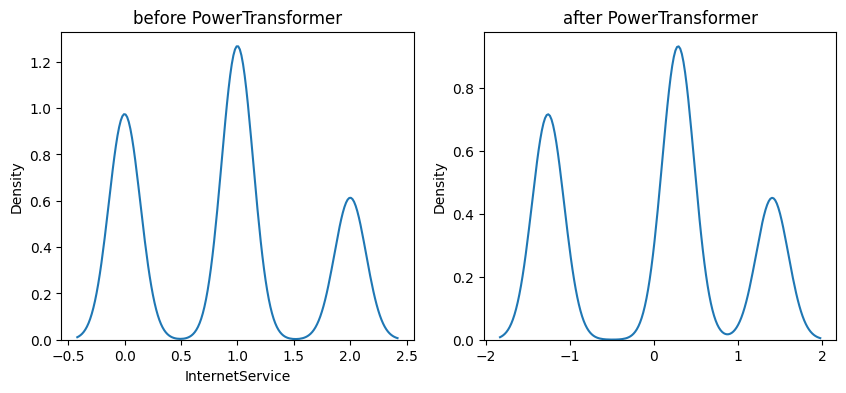

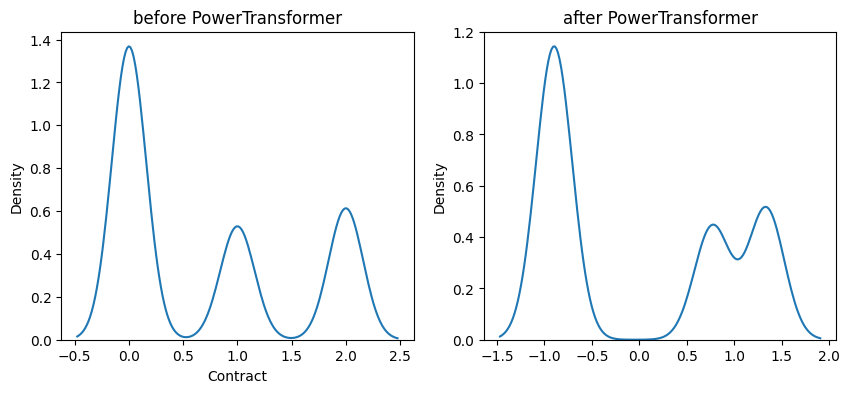

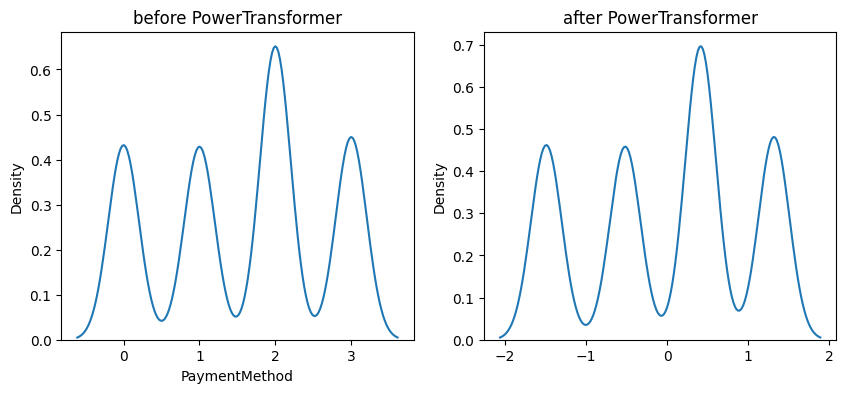

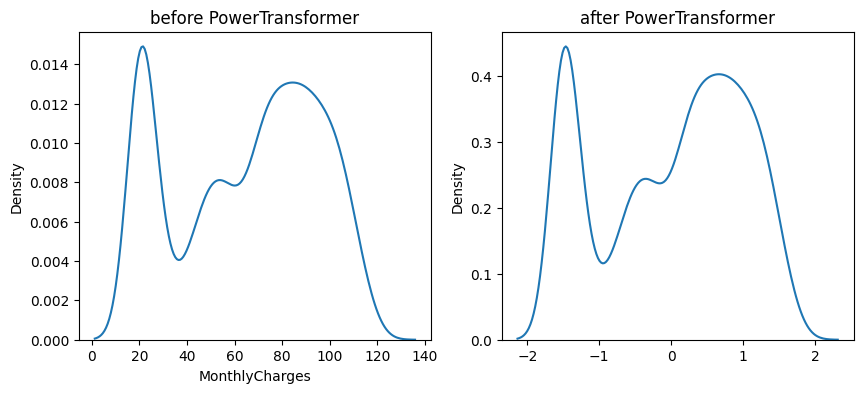

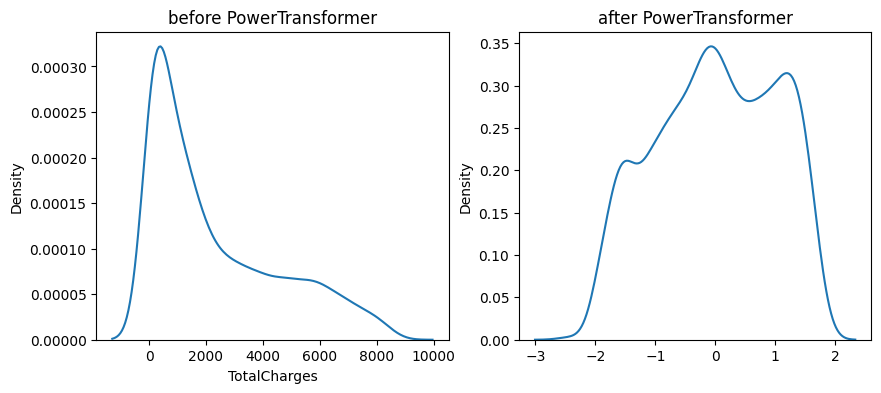

In [55]:
for col in X.select_dtypes('number').columns:
    plots(X_train, col, PowerTransformer(method='yeo-johnson'))

___

Create Pipeline

In [56]:
numeric_pipeline= Pipeline(steps=[
    ('num_impute', SimpleImputer(strategy='median')),
    ('scalar', RobustScaler()),
    ('power-transformer', PowerTransformer(method='yeo-johnson'))
])

categorical_pipeline= Pipeline(steps=[
    ('cat_impute', SimpleImputer(strategy= 'most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor= ColumnTransformer(transformers=[
    ('num_pipline', numeric_pipeline, numerical_columns),
    ('cat_pipeline', categorical_pipeline, categorical_columns)
])

In [57]:
# Show the training data class before and after balancing
print('Before balance')
count_before = pd.value_counts(y)
percentage_before = (count_before / count_before.sum()) * 100
for label, count in count_before.items():
    print(f'{label}: {count} ({percentage_before[label]:.2f}%)')


Before balance
False: 3706 (73.50%)
True: 1336 (26.50%)


### Modeling and Evaluation

#### Unbalanced Data

In [58]:
models= [
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('SVC', SVC(random_state=42, probability=True)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state =42)),
    ('KNN', KNeighborsClassifier())
]

In [74]:
unbalanced_table = pd.DataFrame(columns=['Models', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])
unbalanced_pipeline ={}

for model_name, classifier in models:

    pipeline= Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    pipeline.fit(X_train, y_train_encoded)
    
    unbalanced_pipeline[model_name] = pipeline

    y_pred = pipeline.predict(X_eval)

    unbalanced_metrics = classification_report(y_eval_encoded, y_pred, output_dict=True)

    accuracy = unbalanced_metrics['accuracy']
    precision = unbalanced_metrics['weighted avg']['precision']
    recall = unbalanced_metrics['weighted avg']['recall']
    f1 = unbalanced_metrics['weighted avg']['f1-score']

    unbalanced_table.loc[len(unbalanced_table)] = [model_name, accuracy, precision, recall, f1]

unbalanced_table.sort_values(by="F1_Score", ascending=False)

,Models,Accuracy,Precision,Recall,F1_Score
3,Logistic Regression,0.803766,0.797969,0.803766,0.800154
1,SVC,0.800793,0.791537,0.800793,0.793913
4,KNN,0.780971,0.776272,0.780971,0.778315
2,Random Forest,0.782953,0.770921,0.782953,0.773999
0,Decision Tree,0.717542,0.730513,0.717542,0.723082


Models with high weighted average:
- Logistic Regression (80)
- SVC (79)


___

#### Balanced Data (SMOTE)

In [85]:
balanced_table = pd.DataFrame(columns=['Models', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])
balanced_pipeline ={}

for model_name, classifier in models:

    pipeline= imbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('over-sampler', SMOTE(random_state=42)),
        ('classifier', classifier)
    ])
    pipeline.fit(X_train, y_train_encoded)
    
    balanced_pipeline[model_name] = pipeline

    y_pred = pipeline.predict(X_eval)

    balanced_metrics = classification_report(y_eval_encoded, y_pred, output_dict=True)

    accuracy = balanced_metrics['accuracy']
    precision = balanced_metrics['weighted avg']['precision']
    recall = balanced_metrics['weighted avg']['recall']
    f1 = balanced_metrics['weighted avg']['f1-score']

    balanced_table.loc[len(balanced_table)] = [model_name, accuracy, precision, recall, f1]

balanced_table.sort_values(by="F1_Score", ascending=False)

,Models,Accuracy,Precision,Recall,F1_Score
2,Random Forest,0.780971,0.780191,0.780971,0.780573
3,Logistic Regression,0.757185,0.809258,0.757185,0.769625
1,SVC,0.754212,0.793201,0.754212,0.765240
0,Decision Tree,0.718533,0.735514,0.718533,0.725436
4,KNN,0.706640,0.771777,0.706640,0.722653


__Key Insights__
- With such low FI_Scores, we Observe that over_sampling is not fit for this data


#### Balanced Data (Under-Sampling)

In [86]:
balanced_table1 = pd.DataFrame(columns=['Models', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])
balanced_pipeline1 ={}

for model_name, classifier in models:

    pipeline= imbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('under-sampler', RandomUnderSampler()),
        ('classifier', classifier)
    ])
    pipeline.fit(X_train, y_train_encoded)
    
    balanced_pipeline1[model_name] = pipeline

    y_pred = pipeline.predict(X_eval)

    balanced_metrics = classification_report(y_eval_encoded, y_pred, output_dict=True)

    accuracy = balanced_metrics['accuracy']
    precision = balanced_metrics['weighted avg']['precision']
    recall = balanced_metrics['weighted avg']['recall']
    f1 = balanced_metrics['weighted avg']['f1-score']

    balanced_table1.loc[len(balanced_table1)] = [model_name, accuracy, precision, recall, f1]

balanced_table1.sort_values(by="F1_Score", ascending=False)

,Models,Accuracy,Precision,Recall,F1_Score
1,SVC,0.750248,0.805133,0.750248,0.763266
3,Logistic Regression,0.748266,0.813377,0.748266,0.762138
2,Random Forest,0.736373,0.790096,0.736373,0.749927
4,KNN,0.701685,0.781164,0.701685,0.718821
0,Decision Tree,0.688801,0.746136,0.688801,0.704913


__Key Insights__
- With such low FI_Scores, we conclude that under sampling is not fit for this data


___

### Visualise ROC Curve

#### Unbalanced data

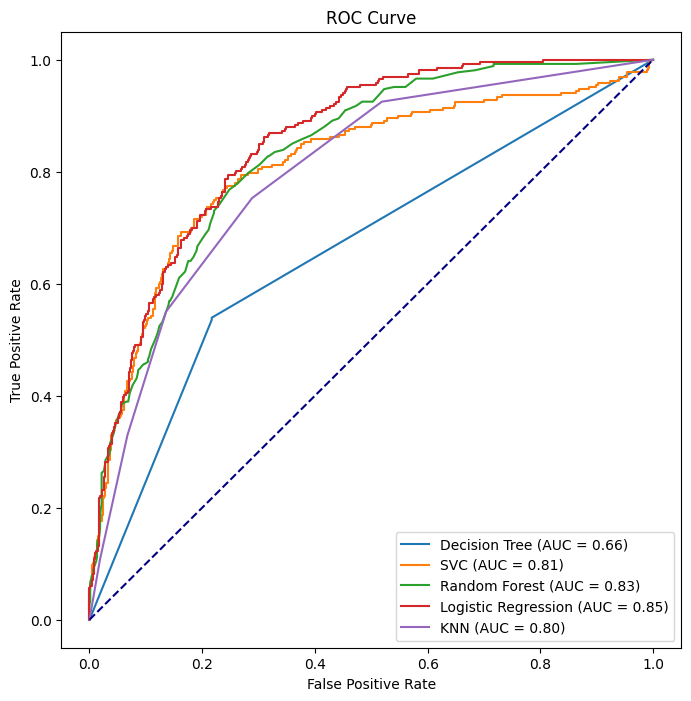

In [79]:
from sklearn.metrics import auc, roc_curve

roc_curve_data={}

fig, ax = plt.subplots(figsize=(8,8))

for model_name, pipeline in unbalanced_pipeline.items():
    y_score = pipeline.predict_proba(X_eval)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_eval_encoded, y_score)
    roc_auc = auc(fpr, tpr)
    
    roc_curve_df = pd.DataFrame({
        'False Positive Rate': fpr,
        'True Positive Rate': tpr,
        'Threshold': thresholds,
    })
    roc_curve_data[model_name] = roc_curve_df
    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
ax.plot([0, 1], [0, 1], 'k--', color='navy')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.legend(loc='lower right')
plt.show()


#### Balanced data

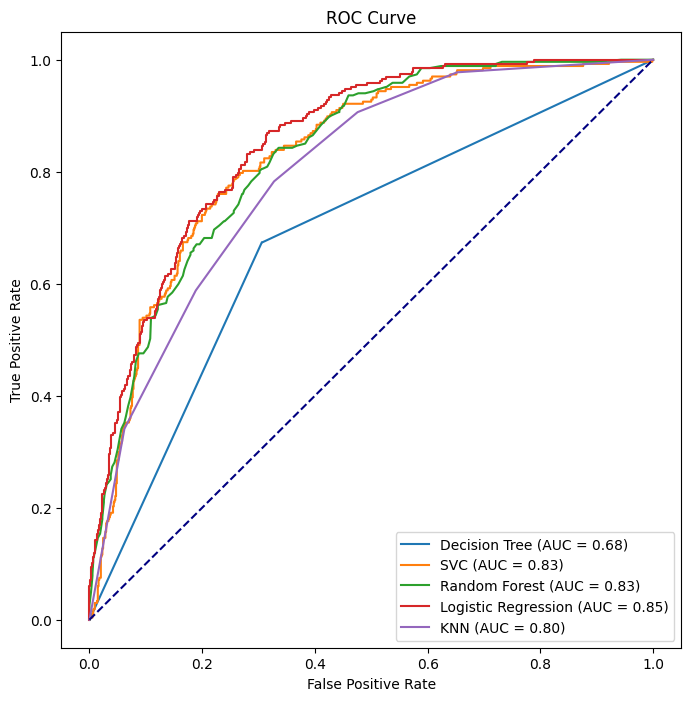

In [94]:
roc_curve_data1={}

fig, ax = plt.subplots(figsize=(8,8))

for model_name, pipeline in balanced_pipeline.items():
    y_score = pipeline.predict_proba(X_eval)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_eval_encoded, y_score)
    roc_auc = auc(fpr, tpr)
    
    roc_curve_df1 = pd.DataFrame({
        'False Positive Rate': fpr,
        'True Positive Rate': tpr,
        'Threshold': thresholds,
    })
    roc_curve_data1[model_name] = roc_curve_df1
    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
ax.plot([0, 1], [0, 1], 'k--', color='navy')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.legend(loc='lower right')
plt.show()


#### Balanced data 2

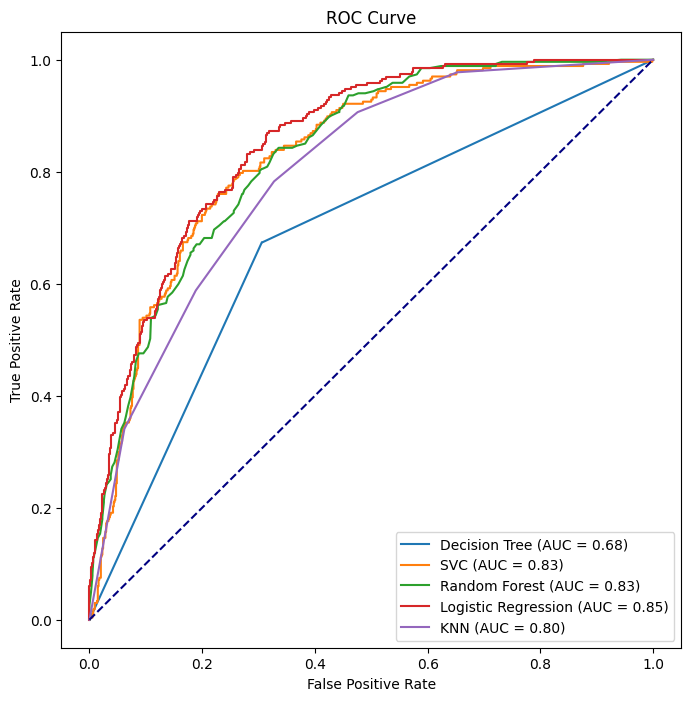

In [96]:
roc_curve_data2={}

fig, ax = plt.subplots(figsize=(8,8))

for model_name, pipeline in balanced_pipeline1.items():
    y_score = pipeline.predict_proba(X_eval)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_eval_encoded, y_score)
    roc_auc = auc(fpr, tpr)
    
    roc_curve_df2 = pd.DataFrame({
        'False Positive Rate': fpr,
        'True Positive Rate': tpr,
        'Threshold': thresholds,
    })
    roc_curve_data2[model_name] = roc_curve_df2
    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
ax.plot([0, 1], [0, 1], 'k--', color='navy')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.legend(loc='lower right')
plt.show()
